[*********************100%***********************]  1 of 1 completed


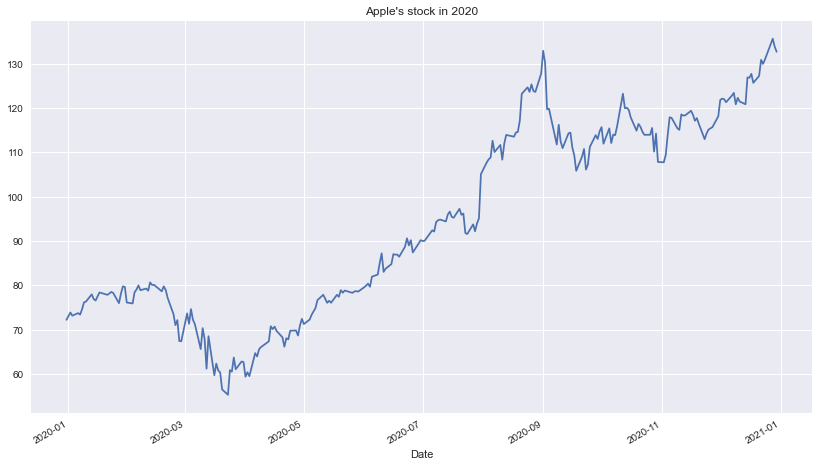

In [17]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Pour installer cette librairie
# https://blog.quantinsti.com/install-ta-lib-python/#windows
# https://stackoverflow.com/questions/46225875/how-to-import-packages-into-pycharm-using-pip
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib
import talib
import ta
import pandas_ta as pta
from finta import TA

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14, 8]

df = yf.download("AAPL",
                 start="2020-01-01",
                 end="2020-12-31")

df["Adj Close"].plot(title="Apple's stock in 2020");

# TA-Lib
Référence dans l'analyse technique

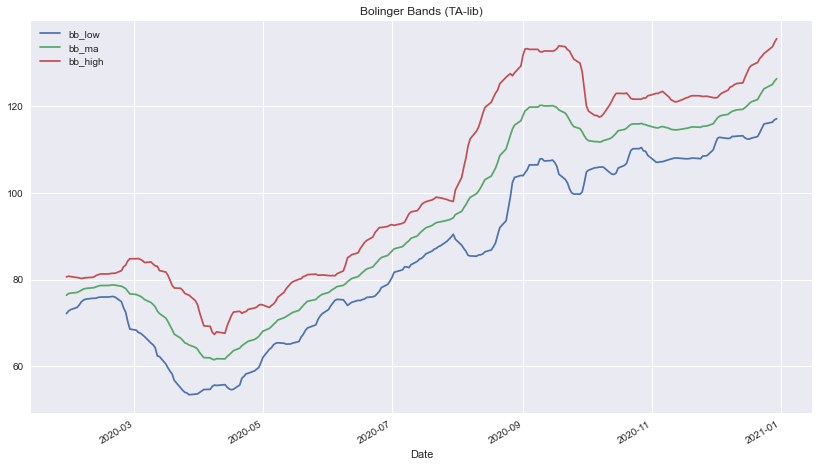

In [18]:
upper, middle, lower = talib.BBANDS(df["Adj Close"], timeperiod=20)
bbands_talib = pd.DataFrame(index=df.index,
                            data={"bb_low": lower,
                                  "bb_ma": middle,
                                  "bb_high": upper})
bbands_talib.plot(title="Bolinger Bands (TA-lib)");

# ta
https://technical-analysis-library-in-python.readthedocs.io/en/latest/#


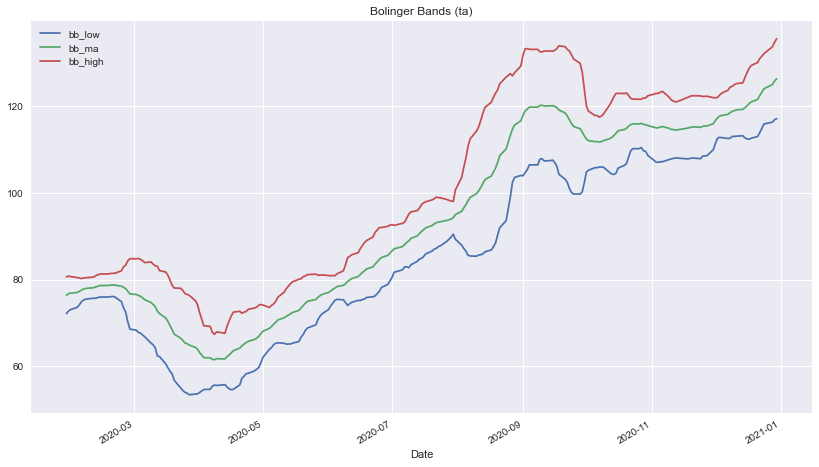

In [19]:
# instantiate the indicator
ta_bbands = ta.volatility.BollingerBands(close=df["Adj Close"],
                                         window=20,
                                         window_dev=2)

# copy as we will be adding to it temporarily
ta_df = df.copy()

# add Bollinger Bands
ta_df["bb_ma"] = ta_bbands.bollinger_mavg()
ta_df["bb_high"] = ta_bbands.bollinger_hband()
ta_df["bb_low"] = ta_bbands.bollinger_lband()

ta_df[["bb_low", "bb_ma", "bb_high"]].plot(title="Bolinger Bands (ta)");

c:\users\syncrase\pycharmprojects\pythonproject\venv\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\users\syncrase\pycharmprojects\pythonproject\venv\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
c:\users\syncrase\pycharmprojects\pythonproject\venv\lib\site-packages\ta\trend.py:938: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_up = pd.Series(index=self._psar.index)
c:\users\syncrase\pycharmprojects\pythonproject\venv\lib\site-packages\ta\trend.py:939: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_down = pd.Series(index=self._psar.index)


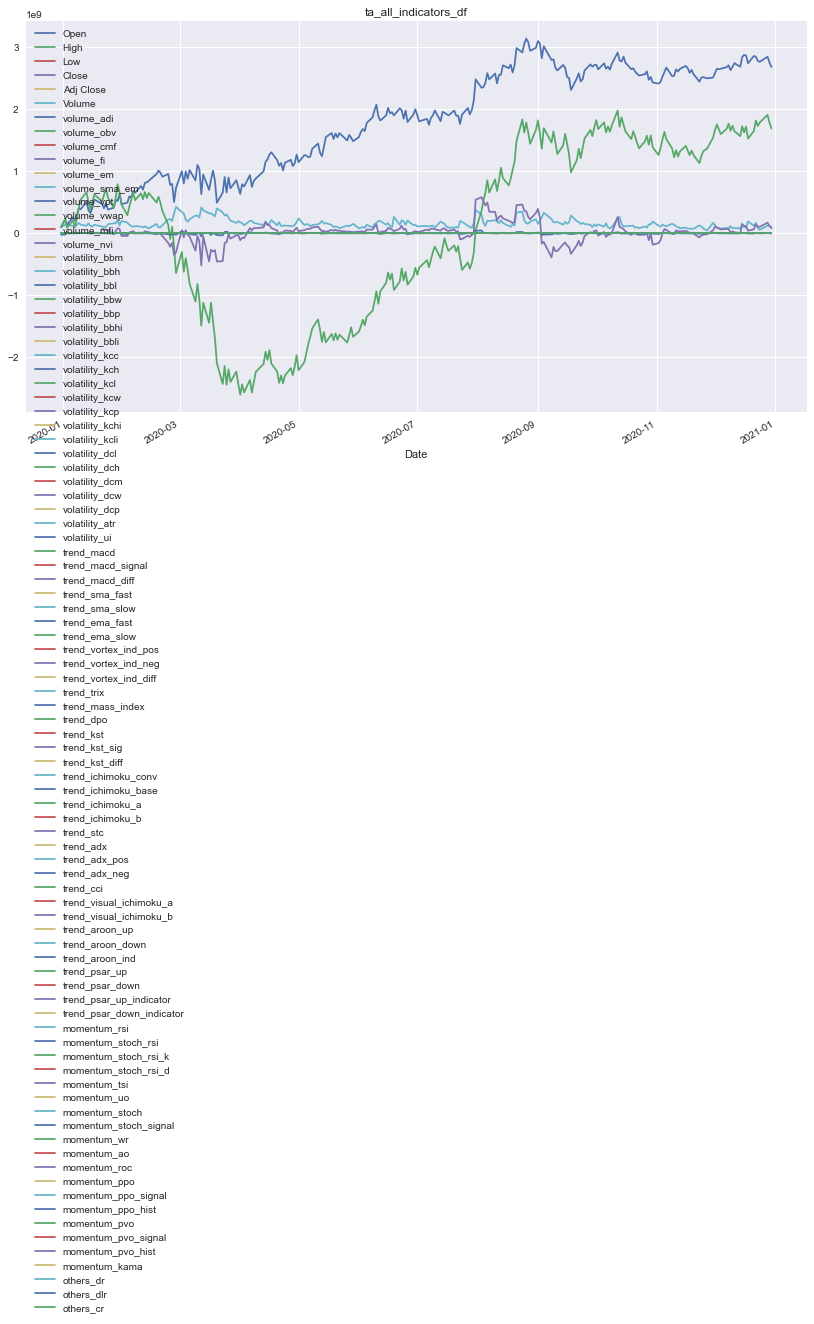

In [21]:
# # add Bollinger Bands low/high indicator
# ta_df["bb_high_ind"] = ta_bbands.bollinger_hband_indicator()
# ta_df["bb_low_ind"] = ta_bbands.bollinger_lband_indicator()
#
# # add additional measures
# ta_df["bb_width"] = ta_bbands.bollinger_wband()
# ta_df["bb_pct"] = ta_bbands.bollinger_pband()

# from ta.utils import dropna
# # Clean NaN values
# df = dropna(df)
# add all available TA indicators
ta_all_indicators_df = ta.add_all_ta_features(df, open="Open", high="High",
                                              low="Low", close="Close",
                                              volume="Volume")

ta_all_indicators_df.plot(title="ta_all_indicators_df");
# ta_all_indicators_df

# pandas-ta
[doc](https://github.com/twopirllc/pandas-ta)
Beaucoup d'indicateurs disponibles

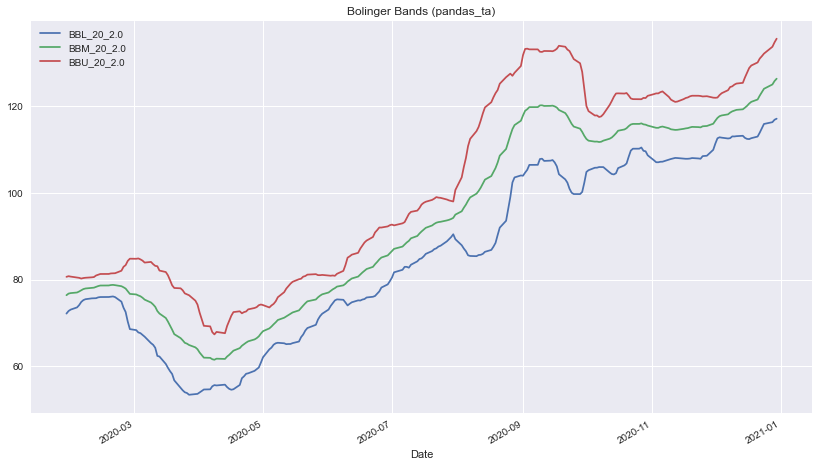

In [22]:
pta_df = pta.bbands(df["Adj Close"], length=20, talib=False)
(
    pta_df[["BBL_20_2.0", "BBM_20_2.0", "BBU_20_2.0"]]
    .plot(title="Bolinger Bands (pandas_ta)")
);

# finta
[doc](https://github.com/peerchemist/finta)
80 indicateurs

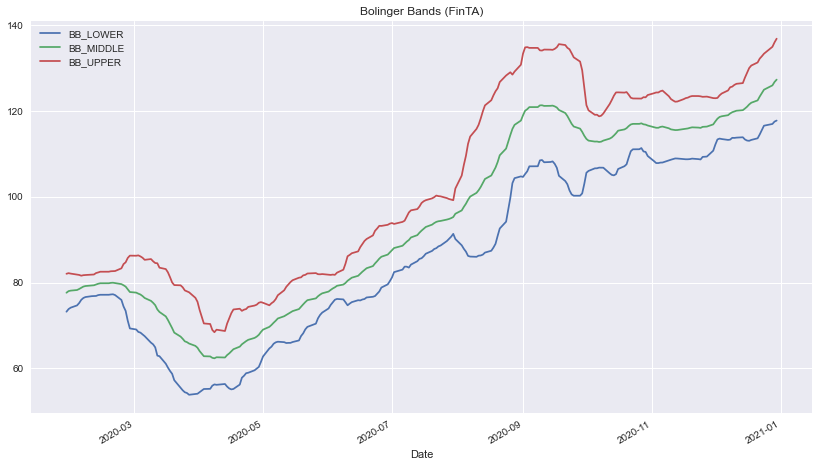

In [23]:
finta_df = TA.BBANDS(df)
(
    finta_df[["BB_LOWER", "BB_MIDDLE", "BB_UPPER"]]
    .plot(title="Bolinger Bands (FinTA)")
);